In [ ]:
#One Hot Encoding - Variables with many categories


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\EDA\Feature Engineering\train.csv',usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [12]:
columns = data.columns
columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [13]:
#how many labels each variable have
for col in columns:
    print(col, ': ', len(data[col].unique()), 'labels')

X1 :  27 labels
X2 :  44 labels
X3 :  7 labels
X4 :  4 labels
X5 :  29 labels
X6 :  12 labels


In [21]:
# COlumns after One Hot Encoding
pd.get_dummies(data, drop_first=True).shape
#this is giving 117 variables which are hard to continue eith

(4209, 117)

In [22]:
#lets take only top 10 most accuring values in each variable(taking X2 column)
data.X2.value_counts().sort_values(ascending=False).head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [28]:
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [33]:
#now making the 10 binary valriables

for label in top_10:
    data[label] = np.where(data['X2']==label, 1, 0)
    
data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [39]:
# Get what set of dummy variablrs, for all the most categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    #Function to create the dummy variables for the most frequent labels
    #we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)

In [41]:
#reading the data again 
data = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\EDA\Feature Engineering\train.csv',usecols=['X1','X2','X3','X4','X5','X6'])

#encode X2 into the top 10 most frequent categories
one_hot_top_x(data, 'X2', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [46]:
#for X1
top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Handling categorical features many categories

## Count/Frequency Technique:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\EDA\Feature Engineering\train.csv', usecols=['X1','X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [3]:
df.shape    # 2 features

(4209, 2)

## One Hot ENcoding 

In [4]:
#after One Hot Encoding  71 features has been created
pd.get_dummies(df).shape

(4209, 71)

## COunt/Frequency Technique

In [5]:
len(df['X1'].unique())

27

In [6]:
len(df['X2'].unique())

44

In [7]:
#lets have a look at how many lebels 
for col in df.columns[0:]:
    print(col, ':', len(df[col].unique()), 'labels')

X1 : 27 labels
X2 : 44 labels


In [8]:
# lets obtain the counts for each one of the labelsin variable X2
#lets capture this in a dictionary that we can use to re-map the labels

df.X2.value_counts().to_dict()  # converint it into the dictionary to map it later on 

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'q': 5,
 'an': 5,
 'av': 4,
 'ah': 4,
 'p': 4,
 'au': 3,
 'am': 1,
 'af': 1,
 'ar': 1,
 'j': 1,
 'l': 1,
 'aa': 1,
 'o': 1,
 'c': 1}

In [9]:
#now replace each labels in X2 by its count

#first we make a dictionary that map each labels to the counts
df_frequency_map = df.X2.value_counts().to_dict()
df_frequency_map

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'q': 5,
 'an': 5,
 'av': 4,
 'ah': 4,
 'p': 4,
 'au': 3,
 'am': 1,
 'af': 1,
 'ar': 1,
 'j': 1,
 'l': 1,
 'aa': 1,
 'o': 1,
 'c': 1}

In [11]:
df.X2.head()

0      6
1      4
2    137
3    137
4    137
Name: X2, dtype: int64

In [10]:
#Now we replace X2 labels in the dataset df
df.X2 = df.X2.map(df_frequency_map)
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


## How to handle Ordinal Categories (Ordinal Encoding)

In [1]:
import pandas as pd 
import datetime

In [2]:
# create a variable with dates, and from that extract the weekdays
# create a list of dateswith 20 days difference from today
#And then transform it into a dataframe

df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0,20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2022-06-07 16:00:47.646747
1,2022-06-06 16:00:47.646747
2,2022-06-05 16:00:47.646747
3,2022-06-04 16:00:47.646747
4,2022-06-03 16:00:47.646747
5,2022-06-02 16:00:47.646747
6,2022-06-01 16:00:47.646747
7,2022-05-31 16:00:47.646747
8,2022-05-30 16:00:47.646747
9,2022-05-29 16:00:47.646747


In [7]:
# extract the weekdays name 

df['day_of_week'] = df['day'].dt.day_name()
df.head(20)

,day,day_of_week
0,2022-06-07 16:00:47.646747,Tuesday
1,2022-06-06 16:00:47.646747,Monday
2,2022-06-05 16:00:47.646747,Sunday
3,2022-06-04 16:00:47.646747,Saturday
4,2022-06-03 16:00:47.646747,Friday
5,2022-06-02 16:00:47.646747,Thursday
6,2022-06-01 16:00:47.646747,Wednesday
7,2022-05-31 16:00:47.646747,Tuesday
8,2022-05-30 16:00:47.646747,Monday
9,2022-05-29 16:00:47.646747,Sunday


In [8]:
# Engineer categorical variables by ordinal number replacement 

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2022-06-07 16:00:47.646747,Tuesday,2
1,2022-06-06 16:00:47.646747,Monday,1
2,2022-06-05 16:00:47.646747,Sunday,7
3,2022-06-04 16:00:47.646747,Saturday,6
4,2022-06-03 16:00:47.646747,Friday,5
5,2022-06-02 16:00:47.646747,Thursday,4
6,2022-06-01 16:00:47.646747,Wednesday,3
7,2022-05-31 16:00:47.646747,Tuesday,2
8,2022-05-30 16:00:47.646747,Monday,1
9,2022-05-29 16:00:47.646747,Sunday,7


# All techniques to Handle Missing values - Day 1

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv(r'titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


## 1. MCAR

In [14]:
df.isnull().sum()  #sex and cabin are not the examples of CMAR as they are interrelated to each other

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [15]:
df[df.embarked.isnull()]   # example of CMAR

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


## 2. missing Data Not at Random (MNAR): Systematic missing values

In [16]:
import numpy as np
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)  #frist converting null values into 1 and rest in zeros

#  find the percent of null vlaues
df['cabin_null'].mean()

0.7752941176470588

In [17]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

In [18]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

## 3. Missing Data At Random (MAR)

# Now Techniques

In [19]:
### 1. mean/median/mode
2. Random sample imputation
3.Capturing NAn values with a new feature
4.End of Distribution imputation
5.Arbitrary imputation
6.Frequent Categories imputaion 

SyntaxError: invalid syntax (<ipython-input-19-33e9da14af7f>, line 2)

### Mean/Median/Mode

In [49]:
df = pd.read_csv(r'titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [50]:
# lets go and see the percentage of missing values
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [51]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)  #not filling mean bcoz there coulc be any outliers

In [52]:
impute_nan(df,'age',median)  #hence median
df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [54]:
impute_nan(df,'fare',median)

In [58]:
df['age_median'].isnull().mean()

0.0

In [60]:
print(df['age'].std())
print(df['age_median'].std())

14.562243434125529
12.999022882894222


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

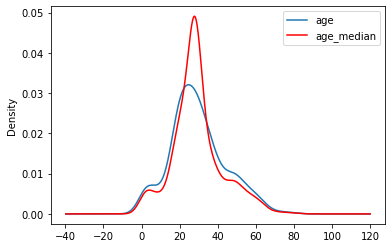

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')